In [3]:
import os
import pysal as ps 
import pandas as pd 
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import pysal.lib
import pysal.explore
import pysal.viz
import pysal.model

In [4]:
os.chdir('C:/Users/jwolf/Documents/MEGA/03_Doutoramento/06_Base de dados/School closure')

In [7]:
path = "C:/Users/jwolf/Documents/MEGA/03_Doutoramento/05_SIG/Administrativos/Freguesias/Cont_AAD_CAOP2018/\
Cont_AAD_CAOP2018.shp"
gdf_freguesias_CAOP2018 = gpd.read_file (path)

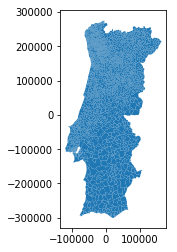

In [8]:
gdf_freguesias_CAOP2018.plot()

In [9]:

gdf_freguesias_CAOP2018['code_mun'] = gdf_freguesias_CAOP2018['Dicofre'].str.slice(0,4)

In [10]:
df_correspond_nuts3 = pd.read_csv("CODIGOS_MUNICIPIOS_NUTS3.csv",engine='python', header = 0,\
                                  sep = ";",dtype= {'Cod_mun': str}, decimal=",")
df_correspond_nuts3.dropna(inplace = True)

In [11]:
# pd.merge(gdf_freguesias_CAOP2018, df_correspond_nuts3, how = left,  left_on = "code_mun")
gdf_freguesias_CAOP2018= pd.merge(gdf_freguesias_CAOP2018, df_correspond_nuts3, how='left', left_on = "code_mun",right_on= "Cod_mun")
gdf_freguesias_CAOP2018.drop(['Cod_mun'], axis=1, inplace = True)

In [12]:
#3763 código epsg etrs89 e Portugal TM06
#WGS84 = epsg 4326

gdf_freguesias_CAOP2018 = gdf_freguesias_CAOP2018.to_crs(epsg=3763)


In [20]:
gdf_freguesias_CAOP2018.head(4)

,Dicofre,Freguesia,Concelho,Distrito,TAA,AREA_EA_Ha,AREA_T_Ha,Des_Simpli,geometry
0,081504,Sagres,VILA DO BISPO,FARO,ÁREA PRINCIPAL,0.04,3436.91,Sagres,POLYGON ((-69674.53039999958 -294276.293899999...
1,081504,Sagres,VILA DO BISPO,FARO,ÁREA PRINCIPAL,0.17,3436.91,Sagres,"POLYGON ((-69645.82100000046 -294240.6941, -69..."
2,081504,Sagres,VILA DO BISPO,FARO,ÁREA PRINCIPAL,0.20,3436.91,Sagres,"POLYGON ((-69720.37119999994 -294162.9945, -69..."
3,081504,Sagres,VILA DO BISPO,FARO,ÁREA PRINCIPAL,0.09,3436.91,Sagres,POLYGON ((-70031.9606999997 -294143.8773999996...


In [13]:
gdf_municipios_CAOP2018 = gdf_freguesias_CAOP2018.dissolve(by='code_mun')
gdf_municipios_CAOP2018.drop(['Dicofre','Freguesia', 'Des_Simpli', 'TAA'], axis = 1, inplace = True)

In [ ]:
df_schools = pd.read_csv("C:/Users/jwolf/Documents/MEGA/03_Doutoramento/05_SIG/Muhamad/Schools.csv",\
                         engine='python', header = 0, sep = ";",dtype= {'Code': str}, decimal=",")
gdf_municipios_CAOP2018 = pd.merge(gdf_municipios_CAOP2018, df_schools, how='left', left_on=['code_mun'],\
                                   right_on = ['Code'])

In [ ]:
l = []
l = list(gdf_municipios_CAOP2018.columns[:9]) + \
["Escolas_" + s  for s in gdf_municipios_CAOP2018.columns[9:24].str.slice(0,4)] +\
list(gdf_municipios_CAOP2018.columns[24:])

gdf_municipios_CAOP2018.columns = l

In [ ]:
#gdf_municipios_CAOP2018.columns.get_loc('TX_99_17')

In [ ]:
df_TFR = pd.read_csv("C:/Users/jwolf/Documents/MEGA/03_Doutoramento/05_SIG/Muhamad/ISF_2017_pivot.csv",\
                         engine='python', header = 0, sep = ";",dtype= {'Code': str}, decimal=",")
gdf_municipios_CAOP2018 = pd.merge(gdf_municipios_CAOP2018, df_TFR, how='left', left_on=['Code'],\
                                   right_on = ['code'])

In [ ]:
l = []
l = list(gdf_municipios_CAOP2018.columns[0:26]) + ["TFR_" + s  for s in gdf_municipios_CAOP2018.columns[26:53]]
gdf_municipios_CAOP2018.columns = l


In [ ]:
df_Migration = pd.read_csv("C:/Users/jwolf/Documents/MEGA/03_Doutoramento/05_SIG/Muhamad/MIGRANTS_pivot.csv",\
                         engine='python', header = 0, sep = ";",dtype= {'code': str}, decimal=",")

In [ ]:
df_Migration.head(3)
gdf_municipios_CAOP2018 = pd.merge(gdf_municipios_CAOP2018, df_Migration, how='left', left_on=['Code'],\
                                   right_on = ['code'])

In [ ]:
l = []
l = list(gdf_municipios_CAOP2018.columns[:54]) + ["MIGR_" + s  for s in gdf_municipios_CAOP2018.columns[54:]]
gdf_municipios_CAOP2018.columns = l


In [ ]:
col_names = pd.read_csv('C:/Users/jwolf/Documents/MEGA/03_Doutoramento/05_SIG/Muhamad/Primary_Schools_FDM.csv',\
                        nrows=0).columns
col_names
types_dict = {'Code': str}
types_dict.update({col: str for col in col_names if col not in types_dict})

df_Schools_FDM = pd.read_csv("C:/Users/jwolf/Documents/MEGA/03_Doutoramento/05_SIG/Muhamad/Primary_Schools_FDM.csv",\
                         engine='python', sep = ";",dtype=types_dict, decimal=",", header=0)

df_Schools_FDM

In [ ]:
l = []
l = ["Schools_FDM" + s  for s in df_Schools_FDM.columns[0:]]
df_Schools_FDM.columns = l 
gdf_municipios_CAOP2018 = pd.merge(gdf_municipios_CAOP2018, df_Schools_FDM, how='left', left_on=['Code'],\
                                  right_on = ['Schools_FDMCode'])

In [20]:
gdf_municipios_CAOP2018.to_file("C:/Users/jwolf/Documents/MEGA/03_Doutoramento/05_SIG/Administrativos/Municípios/Municipios_CAOP2018.shp")

In [ ]:
def Local_moran_I (l, matrizes): 
    a = {}
    for i in l:
        key = str(i)
        value = pysal.explore.esda.Moran_Local\
        (gdf_municipios_CAOP2018[i], matrizes[1], transformation='r', permutations=999)
        a[key] = (matrizes[0],value)
    return(a)

In [ ]:
n_vizinhos = 3
distancia=30000
matrizes = []
matrizes = [("Queen "+str(n_vizinhos)+" neighbours"),\
            pysal.lib.weights.KNN.from_dataframe(gdf_municipios_CAOP2018, k= n_vizinhos)]

#[("Distance "+str(distancia//1000)+'km'),\
#pysal.lib.weights.DistanceBand.from_dataframe(gdf_municipios_CAOP2018, \
#p = 2, alpha=-3, threshold= distancia)] 

In [ ]:
from pysal.explore.esda.moran import Moran
from pysal.viz.splot.esda import plot_moran
l = ['MIGR_1999','MIGR_2017',
    'TFR_1999','TFR_2017']

moran_I = pysal.explore.esda.Moran(gdf_municipios_CAOP2018['TFR_2017'], matrizes[1], transformation='r', permutations=999)
# print("p value =", moran_I.p_norm, "Moran I = ", moran_I.I,"expected value under normality assumption", moran_I.EI) 
plot_moran(moran_I)
plt.show()

In [ ]:
from pysal.viz.splot.esda import lisa_cluster


l = ['MIGR_1999','MIGR_2017',
    'TFR_1999','TFR_2017']
    #'TX_99_17', 'TFR_1997','TFR_2017'
a = Local_moran_I(l, matrizes)
             
fig, axs = plt.subplots(1,len(a),figsize = (20,20))

i=0 
for x, value in dict.items(a):
    legenda = {'loc': 'upper left', 'bbox_to_anchor': (0.8, 0.28),\
    'title': x + '\n'+ value[0]}
    lisa_cluster(value[1], gdf_municipios_CAOP2018.copy(), p=0.1, ax = axs [i], \
    legend_kwds= legenda)
    i+=1
plt.savefig("C:/Users/jwolf/Documents/MEGA/03_Doutoramento/08_Apresentações_publicações/\
Muhammad/TFR_MIGR.png", dpi=600,  bbox_inches="tight")

In [ ]:
l = ['Escolas_1999', 'Escolas_2016']
a = Local_moran_I(l, matrizes)
             
fig, axs = plt.subplots(1,len(a),figsize = (10,5))

i=0 
for x, value in dict.items(a):
    legenda = {'loc': 'upper left', 'bbox_to_anchor': (0.8, 0.28),\
    'title': x + '\n'+ value[0]}
    lisa_cluster(value[1], gdf_municipios_CAOP2018.copy(), p=0.1, ax = axs [i], \
    legend_kwds= legenda)
    i+=1


In [ ]:
df_Schools_FDM.head(3)

In [ ]:
l = ['Schools_FDM1999', 'Schools_FDM2015']
a = Local_moran_I(l, matrizes)
            
fig, axs = plt.subplots(1,len(a),figsize = (10,5))
i=0 

for x, value in dict.items(a):
    legenda = {'loc': 'upper left', 'bbox_to_anchor': (0.8, 0.28),\
    'title': x + '\n'+ value[0]}
    lisa_cluster(value[1], gdf_municipios_CAOP2018.copy(), p=0.1, ax = axs [i], \
    legend_kwds= legenda)
    i+=1

plt.savefig("C:/Users/jwolf/Documents/MEGA/03_Doutoramento/08_Apresentações_publicações/\
Muhammad/Primary_Schools_FDM.png", dpi=600,  bbox_inches="tight")

In [ ]:
gdf_municipios_CAOP2018.head(2)